# Redes Bayesianas

Populating the interactive namespace from numpy and matplotlib


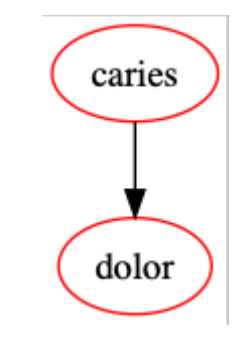

In [34]:
%pylab inline
from pomegranate import *

caries = DiscreteDistribution({'Yes': 0.8, 'No': 0.2})

dolor = ConditionalProbabilityTable(
        [['Yes', 'True', 0.6],
         ['Yes', 'False', 0.4],
         ['No', 'True', 0.1],
         ['No', 'False', 0.9]],
         [caries])

s1 = Node(caries, name="caries")
s2 = Node(dolor, name="dolor")


model = BayesianNetwork("Dentista")
model.add_states(s1, s2)
model.add_edge(s1, s2)

model.bake()
model.plot()

Calcularemos ahora qué probabilidad de padecer caries tenemos si nos duele una muela.

In [35]:
observations = { 'dolor' : 'True'}

beliefs = model.predict_proba(observations)

for state, belief in zip( model.states, beliefs ):
    if type(belief) is not str:
        print(state.name)
        print("Estado", belief.parameters)

caries
('Estado', [{'Yes': 0.95999999999999985, 'No': 0.040000000000000119}])


Ampliamos ahora nuestra red con un nodo y una relación de dependencia más.

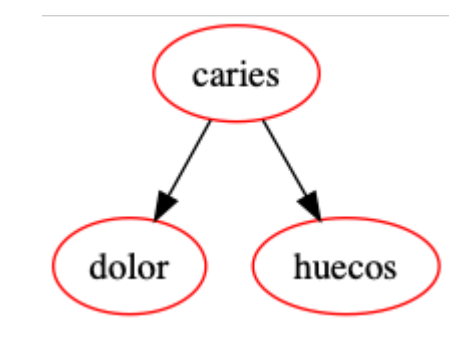

In [36]:
huecos = ConditionalProbabilityTable(
        [['Yes', 'True', 0.9],
         ['Yes', 'False', 0.1],
         ['No', 'True', 0.2],
         ['No', 'False', 0.8]],
         [caries])

s3 = Node(huecos, name="huecos")

model = BayesianNetwork("Dentista")
model.add_states(s1, s2, s3)
model.add_edge(s1, s2)
model.add_edge(s1, s3)

model.bake()
model.plot()

¿Qué probabilidad de padecer caries tenemos si nos duele una muela y tenemos huecos?

In [39]:
#observations = { 'dolor' : 'True', 'huecos': 'True'}
#observations = { 'huecos': 'True'}
observations = { 'dolor': 'True'}

beliefs = model.predict_proba(observations)

for state, belief in zip( model.states, beliefs ):
    if type(belief) is not str:
        print(state.name)
        print("Estado", belief.parameters)

caries
('Estado', [{'Yes': 0.95999999999999963, 'No': 0.040000000000000313}])
huecos
('Estado', [{'False': 0.12800000000000028, 'True': 0.87199999999999978}])
